In [2]:
import joblib
from sklearn.model_selection import RandomizedSearchCV
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from RF_Model_Functions import *
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from scipy.signal import savgol_filter
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

C:\Users\smgls\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
from_one_hot_dict = {(1.,0.,0.,0.) : 0, (0.,1.,0.,0.) : 1, (0.,0.,1.,0.) : 2, (0.,0.,0.,1.) : 3}
from_one_hot_dict_materials = {(1.,0.,0.) : 0, (0.,1.,0.) : 1, (0.,0.,1.) : 2}

In [67]:
spectra_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_new_train.joblib')
spectra_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_test.joblib')
labels_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_new_train.joblib').reset_index()
labels_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_test.joblib').reset_index()
labels_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_train.joblib').reset_index()
spectra_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_train.joblib')

In [68]:
def create_pure_datasets(training_labels, testing_lables, training_spectra, testing_spectra, material, shape):
    
    labels_train_Au = drop_indicies(training_labels, material, 0, False)[0]
    labels_test_Au = drop_indicies(testing_lables, material, 0, False)[0]

    labels_train_Au = labels_train_Au.reset_index()
    labels_test_Au = labels_test_Au.reset_index()

    labels_train_Au_sphere = drop_indicies(labels_train_Au, shape, 0, False)[0].drop(columns = ['level_0'])
    labels_test_Au_sphere = drop_indicies(labels_test_Au, shape, 0, False)[0].drop(columns = ['level_0'])

    labels_train_Au_sphere = labels_train_Au_sphere.reset_index()
    labels_test_Au_sphere = labels_test_Au_sphere.reset_index()

    labels_test_Au_sphere = labels_test_Au_sphere.drop(columns = ['level_0'])
    labels_train_Au_sphere = labels_train_Au_sphere.drop(columns = ['level_0'])
    
    spectra_train_df = pd.DataFrame(training_spectra)
    spectra_test_df = pd.DataFrame(testing_spectra)
        
    spectra_test_df_Au = spectra_test_df.drop(drop_indicies(testing_lables, material, 0, False)[1])
    spectra_train_df_Au = spectra_train_df.drop(drop_indicies(training_labels, material, 0, False)[1])
    spectra_test_df_Au = spectra_test_df_Au.reset_index()
    spectra_train_df_Au = spectra_train_df_Au.reset_index()
    
    spectra_train_df_Au.drop(columns = ['index'], inplace = True)
    spectra_test_df_Au.drop(columns = ['index'], inplace = True)
    
    spectra_test_df_Au_sphere = spectra_test_df_Au.drop(drop_indicies(labels_test_Au, shape, 0, False)[1])
    spectra_train_df_Au_sphere = spectra_train_df_Au.drop(drop_indicies(labels_train_Au, shape, 0, False)[1])
    
    spectra_test_df_Au_sphere.reset_index(inplace = True)
    spectra_train_df_Au_sphere.reset_index(inplace = True)
    
    spectra_test_df_Au_sphere = spectra_test_df_Au_sphere.drop(columns = ["index"])
    spectra_train_df_Au_sphere = spectra_train_df_Au_sphere.drop(columns = ["index"])
    
    return(labels_train_Au_sphere, labels_test_Au_sphere, spectra_train_df_Au_sphere, spectra_test_df_Au_sphere)

In [40]:
Au_Sphere = create_pure_datasets(labels_train, labels_test, spectra_train, spectra_test, "Material_Au", "Geometry_sphere")
Au_sphere_training_spectra = Au_Sphere[2]
Au_sphere_test_spectra = Au_Sphere[3]
Au_sphere_training_labels = Au_Sphere[0]
Au_sphere_test_labels = Au_Sphere[1]

In [101]:
Au_sphere_training_spectra

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.001405,0.001426,0.001447,0.001468,0.001489,0.001510,0.001532,0.001554,0.001576,0.001598,...,0.005444,0.005458,0.005472,0.005486,0.005501,0.005516,0.005532,0.005548,0.005565,0.005582
1,0.004633,0.004656,0.004679,0.004703,0.004727,0.004751,0.004775,0.004800,0.004825,0.004849,...,0.015394,0.015336,0.015271,0.015199,0.015121,0.015038,0.014950,0.014858,0.014762,0.014663
2,0.000301,0.000306,0.000312,0.000318,0.000324,0.000329,0.000335,0.000341,0.000347,0.000353,...,0.002582,0.002589,0.002596,0.002604,0.002611,0.002619,0.002627,0.002635,0.002643,0.002652
3,0.004771,0.004794,0.004817,0.004841,0.004865,0.004889,0.004913,0.004938,0.004963,0.004987,...,0.013954,0.013853,0.013754,0.013657,0.013562,0.013471,0.013384,0.013300,0.013222,0.013148
4,0.005307,0.005330,0.005354,0.005378,0.005402,0.005426,0.005450,0.005475,0.005500,0.005525,...,0.010298,0.010295,0.010293,0.010291,0.010287,0.010282,0.010275,0.010264,0.010250,0.010235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13378,0.004922,0.004945,0.004968,0.004992,0.005016,0.005040,0.005065,0.005089,0.005114,0.005139,...,0.012517,0.012523,0.012535,0.012550,0.012569,0.012590,0.012614,0.012638,0.012664,0.012688
13379,0.000095,0.000097,0.000099,0.000101,0.000103,0.000105,0.000107,0.000109,0.000111,0.000113,...,0.001259,0.001263,0.001267,0.001271,0.001275,0.001279,0.001283,0.001287,0.001292,0.001296
13380,0.002070,0.002095,0.002120,0.002146,0.002172,0.002198,0.002224,0.002251,0.002278,0.002305,...,0.006321,0.006340,0.006359,0.006378,0.006398,0.006419,0.006440,0.006462,0.006484,0.006507
13381,0.004632,0.004655,0.004678,0.004702,0.004726,0.004750,0.004775,0.004799,0.004824,0.004849,...,0.015370,0.015309,0.015241,0.015166,0.015085,0.014998,0.014906,0.014810,0.014711,0.014608


In [38]:
RF_Au_Sphere = Train_Random_Forests_Size_Regression("all", Au_Sphere[2], Au_Sphere[0], Au_Sphere[3], Au_Sphere[1], 50)

In [39]:
RF_Au_Sphere[0]

0.9999018773102332

In [60]:
def create_mixture_dataframe(spectra_to_mix_train, spectra_to_mix_test, combine_w_pure_samples = True):    
    mix_list = []
    for row in range(0, len(spectra_to_mix_train.index)-1):
        new_row = spectra_to_mix_train.loc[row]*0.5 + spectra_to_mix_train.loc[row+1]*0.5
        mix_list.append(new_row)


    mix_list_test = []
    for row in range(0, len(spectra_to_mix_test.index)-1):
        new_row = spectra_to_mix_test.loc[row]*0.5 + spectra_to_mix_test.loc[row+1]*0.5
        mix_list_test.append(new_row)

    mixed_spectra_train_df = pd.DataFrame(mix_list)
    mixed_spectra_test_df = pd.DataFrame(mix_list_test)

    labels_test = np.ones(203)
    if combine_w_pure_samples == True:
        labels_test = np.append(labels_test, np.zeros(204))
    labels_test_df = pd.DataFrame(labels_test, columns = ["Mixture"])

    labels_train = np.ones(13382)
    if combine_w_pure_samples == True:
        labels_train = np.append(labels_train, np.zeros(13383))
    labels_train_df = pd.DataFrame(labels_train, columns = ["Mixture"])

    if combine_w_pure_samples == True:
        spectra_test_mixture = mixed_spectra_test_df.append(Au_sphere_test_spectra)
    if combine_w_pure_samples == False:
        spectra_test_mixture = mixed_spectra_test_df
    spectra_test_mixture.reset_index(inplace = True)
    spectra_test_mixture.drop(columns = ['index'], inplace = True)

    if combine_w_pure_samples == True:
        spectra_train_mixture = mixed_spectra_train_df.append(Au_sphere_training_spectra)
    if combine_w_pure_samples == False:
        spectra_train_mixture = mixed_spectra_train_df
    spectra_train_mixture.reset_index(inplace = True)
    spectra_train_mixture.drop(columns = ['index'], inplace = True)
    
    return(labels_train_df, labels_test_df, spectra_train_mixture, spectra_test_mixture)

In [61]:
Au_spheres_mixtures = create_mixture_dataframe(Au_sphere_training_spectra, Au_sphere_test_spectra)
Au_sphere_mixture_training_spectra = Au_spheres_mixtures[2]
Au_sphere_mixture_test_spectra = Au_spheres_mixtures[3]
Au_sphere_mixture_training_labels = Au_spheres_mixtures[0]
Au_sphere_mixture_test_labels = Au_spheres_mixtures[1]

In [71]:
Au_Wire = create_pure_datasets(labels_train, labels_test, spectra_train, spectra_test, "Material_Au", "Geometry_wire")
Au_wire_training_spectra = Au_Wire[2]
Au_wire_test_spectra = Au_Wire[3]
Au_wire_training_labels = Au_Wire[0]
Au_wire_test_labels = Au_Wire[1]

In [91]:
print(len(Au_sphere_test_spectra))
print(len(Au_wire_test_spectra))
mix_list = []
for row in range(0, len(Au_sphere_training_spectra.index)-1):
    new_row = Au_wire_training_spectra.loc[row]*0.5 + Au_sphere_training_spectra.loc[row+1]*0.5
    mix_list.append(new_row)


mix_list_test = []
for row in range(0, len(Au_sphere_test_spectra.index)-1):
    new_row = Au_sphere_test_spectra.loc[row]*0.5 + Au_wire_test_spectra.loc[row+1]*0.5
    mix_list_test.append(new_row)

mixed_spectra_train_df = pd.DataFrame(mix_list)
mixed_spectra_test_df = pd.DataFrame(mix_list_test)

labels_test = np.full((1,len(mix_list_test)), 2)[0]
labels_train = np.full((1,len(mix_list)), 2)[0]

labels_train_df = pd.DataFrame(labels_train, columns = ["Mixture"])
labels_test_df = pd.DataFrame(labels_test, columns = ["Mixture"])

204
400


In [93]:
Au_wire_sphere_mixture_train_spectra = pd.concat([Au_sphere_mixture_training_spectra, mixed_spectra_train_df])
Au_wire_sphere_mixture_test_spectra = pd.concat([Au_sphere_mixture_test_spectra, mixed_spectra_test_df])
Au_wire_sphere_mixture_train_labels = pd.concat([Au_sphere_mixture_training_labels, labels_train_df])
Au_wire_sphere_mixture_test_labels = pd.concat([Au_sphere_mixture_test_labels, labels_test_df])

0.6049180327868853
Confusion matrix, without normalization
[[0.92 0.08 0.  ]
 [0.1  0.9  0.  ]
 [0.08 0.92 0.  ]]


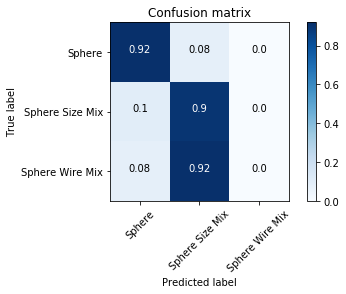

In [100]:
rf_wire_sphere_mixture = RandomForestClassifier(n_estimators = 100, max_features = 20, n_jobs = -1, max_depth = 10, min_samples_leaf = 2, 
                                   bootstrap = True)
rf_wire_sphere_mixture.fit(np.asarray(Au_wire_sphere_mixture_train_spectra), np.ravel(Au_wire_sphere_mixture_train_labels))
print(rf_mixture.score(np.asarray(Au_wire_sphere_mixture_test_spectra), np.ravel(Au_wire_sphere_mixture_test_labels)))
predictions = rf_mixture.predict(np.asarray(Au_wire_sphere_mixture_test_spectra))
cm_mixture = confusion_matrix(np.ravel(Au_wire_sphere_mixture_test_labels), predictions)
cm_normalized = normalize_cm(cm_mixture, list(np.ravel(Au_wire_sphere_mixture_test_labels)), 3)

plot_confusion_matrix(np.asarray(cm_normalized), ["Sphere", "Sphere Size Mix", "Sphere Wire Mix"])

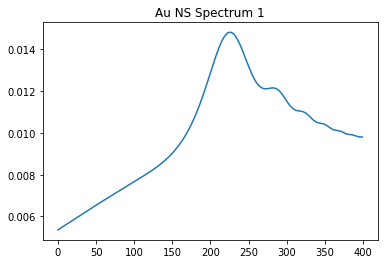

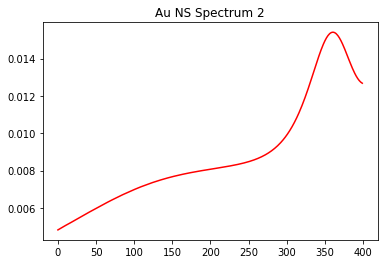

Text(0.5, 1.0, 'Unknown Spectrum')

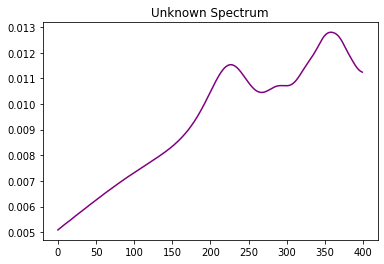

In [47]:
plt.plot(spectra_train_df_Au_sphere.loc[69])
plt.title("Au NS Spectrum 1")
plt.show()
plt.plot(spectra_train_df_Au_sphere.loc[70], color = 'r')
plt.title("Au NS Spectrum 2")
plt.show()
plt.plot((spectra_train_df_Au_sphere.loc[70]*0.5 + spectra_train_df_Au_sphere.loc[69]*0.5), color = 'purple')
plt.title("Unknown Spectrum")

In [49]:
for depth in np.linspace(8,12,5):    
    rf_mixture = RandomForestClassifier(n_estimators = 50, max_features = 400, n_jobs = -1, max_depth = depth)
    rf_mixture.fit(np.asarray(spectra_train_mixture), np.ravel(labels_train_df))
    print("max depth = " + str(depth), rf_mixture.score(np.asarray(spectra_test_mixture), np.ravel(labels_test_df)))
    #predictions = rf_mixture.predict(np.asarray(spectra_test_mixture))
    #cm_mixture = confusion_matrix(np.ravel(labels_test_df), predictions)
    #cm_normalized = normalize_cm(cm_mixture, list(np.ravel(labels_test_df)), 2)
    #plot_confusion_matrix(np.asarray(cm_normalized), ["not mixture", "mixture"])

max depth = 8.0 0.8574938574938575
max depth = 9.0 0.8697788697788698
max depth = 10.0 0.8648648648648649
max depth = 11.0 0.8624078624078624
max depth = 12.0 0.8574938574938575


0.9017199017199017
Confusion matrix, without normalization
[[0.91 0.09]
 [0.1  0.9 ]]


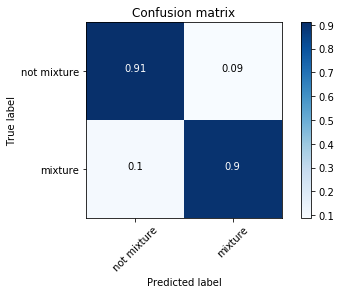

In [103]:
rf_mixture = RandomForestClassifier(n_estimators = 100, max_features = 20, n_jobs = -1, max_depth = 10, 
                                   bootstrap = True)
rf_mixture.fit(np.asarray(Au_sphere_mixture_training_spectra), np.ravel(Au_sphere_mixture_training_labels))
print(rf_mixture.score(np.asarray(Au_sphere_mixture_test_spectra), np.ravel(Au_sphere_mixture_test_labels)))
predictions = rf_mixture.predict(np.asarray(Au_sphere_mixture_test_spectra))
cm_mixture = confusion_matrix(np.ravel(Au_sphere_mixture_test_labels), predictions)
cm_normalized = normalize_cm(cm_mixture, list(np.ravel(Au_sphere_mixture_test_labels)), 2)
plot_confusion_matrix(np.asarray(cm_normalized), ["not mixture", "mixture"])

0.7837837837837838
Confusion matrix, without normalization
[[0.61 0.39]
 [0.04 0.96]]


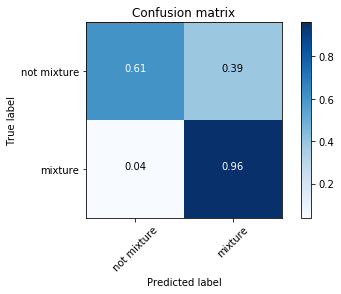

In [35]:
rf_mixture = RandomForestClassifier(n_estimators = 100, max_features = 'auto', n_jobs = -1, 
                                   bootstrap = True)
rf_mixture.fit(np.asarray(spectra_train_mixture), np.ravel(labels_train_df))
print(rf_mixture.score(np.asarray(spectra_test_mixture), np.ravel(labels_test_df)))
predictions = rf_mixture.predict(np.asarray(spectra_test_mixture))
cm_mixture = confusion_matrix(np.ravel(labels_test_df), predictions)
cm_normalized = normalize_cm(cm_mixture, list(np.ravel(labels_test_df)), 2)
plot_confusion_matrix(np.asarray(cm_normalized), ["not mixture", "mixture"])